# Mapping in Python

## This notebook provides a short introduction to creating geographical maps in Python, we'll see 2 libraries: 

+ [Basemap](https://matplotlib.org/basemap/): The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python, it is powerful, but will be replaced slowly by [Cartopy](https://github.com/SciTools/cartopy)
+ [Cartopy](https://github.com/SciTools/cartopy) is a Python package designed to make drawing maps for data analysis and visualisation as easy as possible. Its development is funded partly by the UKMO 

for **interactive** maps, you can see [Folium](https://github.com/python-visualization/folium), which we won't be covering.

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
from IPython.display import Image, HTML

### first we import matplotlib and numpy the usual way

In [15]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

### use the inline backend

In [16]:
%matplotlib inline

## BASEMAP

### import [basemap](https://matplotlib.org/basemap/)

In [17]:
from mpl_toolkits.basemap import Basemap as bm


### what projections are supported in basemap ?

In [18]:
from mpl_toolkits.basemap import supported_projections, projection_params 

In [19]:
print(supported_projections)

 rotpole          Rotated Pole                            
 merc             Mercator                                
 cyl              Cylindrical Equidistant                 
 sinu             Sinusoidal                              
 kav7             Kavrayskiy VII                          
 ortho            Orthographic                            
 tmerc            Transverse Mercator                     
 gall             Gall Stereographic Cylindrical          
 cea              Cylindrical Equal Area                  
 nsper            Near-Sided Perspective                  
 stere            Stereographic                           
 mill             Miller Cylindrical                      
 splaea           South-Polar Lambert Azimuthal           
 eck4             Eckert IV                               
 nplaea           North-Polar Lambert Azimuthal           
 omerc            Oblique Mercator                        
 laea             Lambert Azimuthal Equal Area          

#### you can get the parameters needed to initialise each projection by using `projection_params`

In [20]:
projection_params['merc']

'corners plus lat_ts (no width/height)'

### Draw basemap of a region with a bathymetric and topographic overlay

defines the parameters for the *Mercator* projection

In [54]:
llcrnrlat = -50 # lower left corner latitude 
urcrnrlat = 10 # upper right corner latitude 

llcrnrlon = 150 # lower left corner longitude
urcrnrlon = 290 # upper right corner longitude

lat_ts = -40 # true scale latitude

#### initialises a *map* object with the given projection

here we use the simple *Mercator* projection

In [55]:
m = bm(projection='merc',\
            llcrnrlat=llcrnrlat,\
            urcrnrlat=urcrnrlat,\
            llcrnrlon=llcrnrlon,\
            urcrnrlon=urcrnrlon,\
            lat_ts=lat_ts,\
            resolution='i', \
            area_thresh=100)

if you used the resolution `'f'` (full) it will take time to initialise the map, if you re-run your notebook 
several times, you can actually just save the `map` object to disk using the [pickle]() library, which comes with Python (it is part of what is called the [Standard Library](https://docs.python.org/3/library/index.html))

In [56]:
import os
import pickle

In [57]:
# if not os.path.exists('./basemap.p'): 
#     pickle.dump(m, open('./basemap.p','wb'))
# else:
#     m = pickle.load('./basemap.p','rb')

### Plots

In [ ]:
http://oceanwatch.pifsc.noaa.gov/

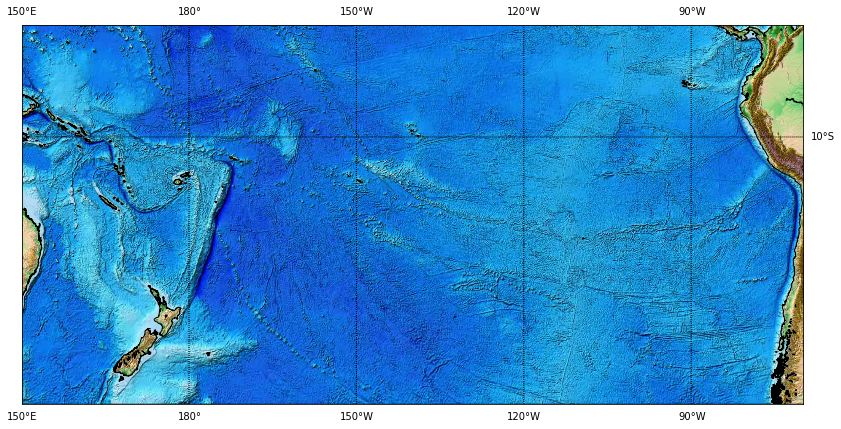

In [89]:
f, ax = plt.subplots(figsize=(14,10)) # creates a figure, and axes in the figure

m.ax = ax # the axes in which the map needs to be embedded are set

m.etopo() # draw bathymetry and topography

m.drawcoastlines()

parallels = np.arange(llcrnrlat, urcrnrlat, 40) #  vector of parallels (latitudes) 

m.drawparallels(parallels, labels=[False,True,False,False]) # left, right, top, bottom

meridians = np.arange(llcrnrlon, urcrnrlon, 30) #  vector of meridians (longitudes) 

m.drawmeridians(meridians,  labels=[False,False,True,True]) # left, right, top, bottom

plt.show()

### overlay data on a basemap

we use xarra as usual to read a netcdf file, this time over the network (thredds server)

In [91]:
import xarray as xr

In [92]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/interp_OLR/olr.mon.mean.nc'

In [93]:
dset = xr.open_dataset(url)

#### selects a domain in lat and lon and a month (January 1998, i.e. during a strong El Niño)

In [94]:
dset = dset.sel(lat=slice(20, -50), lon=slice(150, 290), time='1998-01')

In [95]:
dset

<xarray.Dataset>
Dimensions:  (lat: 29, lon: 57, time: 1)
Coordinates:
  * lon      (lon) float32 150.0 152.5 155.0 157.5 160.0 162.5 165.0 167.5 ...
  * lat      (lat) float32 20.0 17.5 15.0 12.5 10.0 7.5 5.0 2.5 0.0 -2.5 ...
  * time     (time) datetime64[ns] 1998-01-01
Data variables:
    olr      (time, lat, lon) float64 ...
Attributes:
    title:                           Monthly means of OLR from interpolated O...
    history:                         Created from daily OLR files obtained at...
    description:                     Data is interpolated in time and space f...
    platform:                        Observation
    Conventions:                     CF-1.2
    References:                      https://www.esrl.noaa.gov/psd/data/gridd...
    references:                      https://www.esrl.noaa.gov/psd/data/gridd...
    Citation:                        Liebmann and Smith: June 2006: Descripti...
    dataset_title:                   NOAA Interpolated Outgoing Longwave Radi.

In [96]:
olr = dset['olr'].squeeze()

`plt.imshow` is a very convenient function of matplotlib to quickly visualise a 2-D field

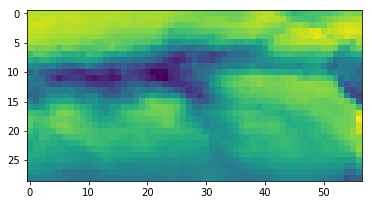

In [98]:
plt.imshow(olr)

#### get the longitudes and latitude vectors

In [99]:
lon = dset['lon']

In [100]:
lat = dset['lat']

#### makes them 2 dimensional

In [101]:
lons, lats = np.meshgrid(lon, lat)

#### map using pcolormesh (gridded faceted plot)

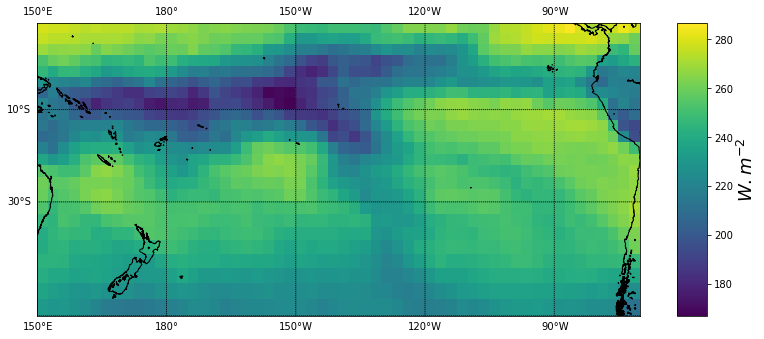

In [102]:
f, ax = plt.subplots(figsize=(12,8))

m.ax = ax

im = m.pcolormesh(lons, lats, olr, latlon=True)

m.drawcoastlines()

parallels = np.arange(llcrnrlat, urcrnrlat, 20)

m.drawparallels(parallels, labels=[1,0,0,0]) # left, right, top, bottom

# m.drawparallels(parallels, labels=[True,False,False,False]) # this works too

meridians = np.arange(llcrnrlon, urcrnrlon, 30)

m.drawmeridians(meridians,  labels=[0,0,1,1]) # left, right, top, bottom

cb = m.colorbar(im, pad='6%')
cb.set_label(r'$W.m^{-2}$', fontsize=18)

plt.show()

#### using contourf (filled contours)

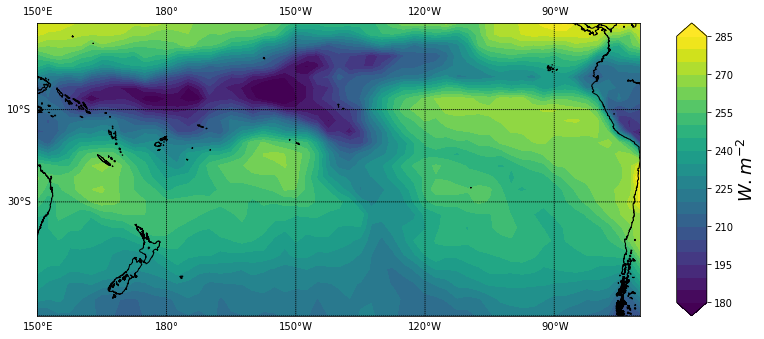

In [103]:
from mpl_toolkits.basemap import Basemap

f, ax = plt.subplots(figsize=(12,8))

m.ax = ax

im = m.contourf(lons, lats, olr, np.arange(180, 290, 5), latlon=True, extend='both')

# Choosing another colormap (see http://matplotlib.org/users/colormaps.html) is easy:
# im = m.contourf(lons, lats, olr, np.arange(180, 290, 5), latlon=True, extend='both', cmap=plt.get_cmap('cubehelix_r'))

m.drawcoastlines()

parallels = np.arange(llcrnrlat, urcrnrlat, 20)

m.drawparallels(parallels, labels=[1,0,0,0]) # left, right, top, bottom

meridians = np.arange(llcrnrlon, urcrnrlon, 30)

m.drawmeridians(meridians,  labels=[0,0,1,1]) # left, right, top, bottom

cb = m.colorbar(im, pad='6%')
cb.set_label(r'$W.m^{-2}$', fontsize=18)

plt.show()

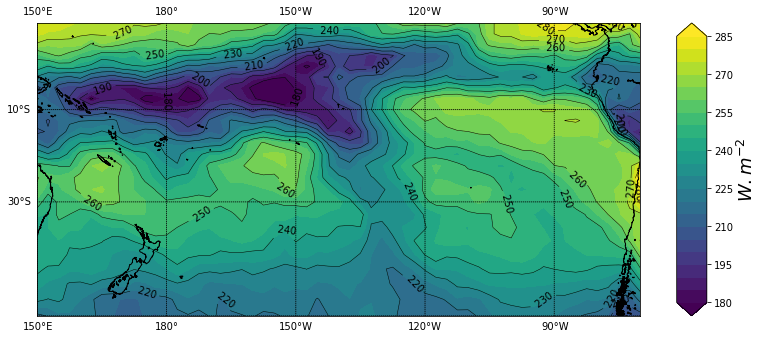

In [104]:
from mpl_toolkits.basemap import Basemap

f, ax = plt.subplots(figsize=(12,8))

m.ax = ax

im = m.contourf(lons, lats, olr, np.arange(180, 290, 5), latlon=True, extend='both')

cs = m.contour(lons, lats, olr, np.arange(180, 290, 10), latlon=True, colors='k', linewidths=0.5)

plt.clabel(cs, colors='k', fmt="%4i")

# Choosing another colormap (see http://matplotlib.org/users/colormaps.html) is easy:
# im = m.contourf(mlon, mlat, olr, np.arange(180, 290, 5), latlon=True, cmap=plt.get_cmap('cubehelix_r'))

m.drawcoastlines()

parallels = np.arange(llcrnrlat, urcrnrlat, 20)

m.drawparallels(parallels, labels=[1,0,0,0]) # left, right, top, bottom

meridians = np.arange(llcrnrlon, urcrnrlon, 30)

m.drawmeridians(meridians,  labels=[0,0,1,1]) # left, right, top, bottom

cb = m.colorbar(im, pad='6%')

cb.set_label(r'$W.m^{-2}$', fontsize=18)

plt.show();

## CARTOPY

we're going to do approximately the same maps, but now using [cartopy](https://github.com/SciTools/cartopy)

### imports 

In [108]:
import cartopy
print(cartopy.__version__)

0.15.1


In [113]:
from cartopy import crs as ccrs
from cartopy import feature as cfeature 
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

### first define the projection

central longitude

In [114]:
central_longitude = 180.

In [115]:
proj = ccrs.PlateCarree(central_longitude=central_longitude)

#### map using pcolormesh (gridded faceted plot)

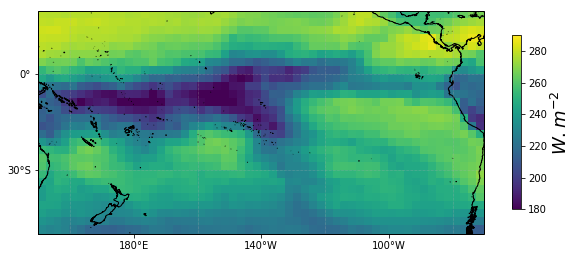

In [126]:
f, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection':proj})

ax.coastlines('10m')

# ax.add_feature(cfeature.GSHHSFeature(scale='low'))

im = ax.pcolormesh(lons - central_longitude, lats, olr, vmin=180, vmax=290)

cb = plt.colorbar(im, shrink=0.4)

cb.set_label(r'$W.m^{-2}$', fontsize=18)

xticks = np.arange(0, 360, 40)
yticks = np.arange(-90., 90., 30.)

gl = ax.gridlines(draw_labels=False, lw=0.5, linestyle=':', xlocs=xticks, ylocs=yticks)

ax.set_xticks(xticks, crs=proj)

ax.set_yticks(yticks, crs=proj)

lon_formatter = LongitudeFormatter(zero_direction_label=True, dateline_direction_label=True)

lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([lon.data.min() - central_longitude, lon.data.max() - central_longitude, lat.data.min(), lat.data.max()], crs=proj)

#### using contourf (filled contours)

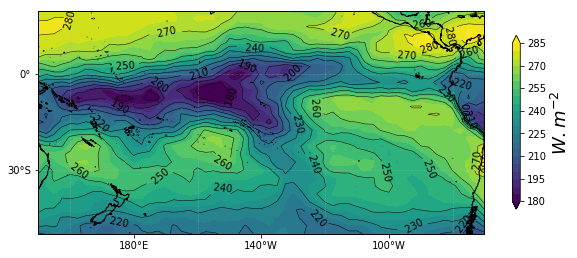

In [124]:
f, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection':proj})

ax.coastlines('10m')

# ax.add_feature(cfeature.GSHHSFeature(scale='low'))

im = ax.contourf(lons - central_longitude, lats, olr, np.arange(180, 290, 5), extend='both')

cb = plt.colorbar(im, shrink=0.4)

cb.set_label(r'$W.m^{-2}$', fontsize=18)

cs = ax.contour(lons - central_longitude, lats, olr, np.arange(180, 290, 10), latlon=True, colors='k', linewidths=0.5)

plt.clabel(cs, colors='k', fmt="%4i")

xticks = np.arange(0, 360, 40)
yticks = np.arange(-90., 90., 30.)

gl = ax.gridlines(draw_labels=False, lw=0.5, linestyle=':', xlocs=xticks, ylocs=yticks)

ax.set_xticks(xticks, crs=proj)

ax.set_yticks(yticks, crs=proj)

lon_formatter = LongitudeFormatter(zero_direction_label=True, dateline_direction_label=True)

lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([lon.data.min() - central_longitude, lon.data.max() - central_longitude, lat.data.min(), lat.data.max()], crs=proj)